# Customer Data Analysis and Predictive Modeling for Term Deposit Subscriptions at a Portuguese Bank

**By - Shahid Afroz**

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [23]:
df=pd.read_csv("banking_data.csv")
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


# What is the distribution of age among the clients?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


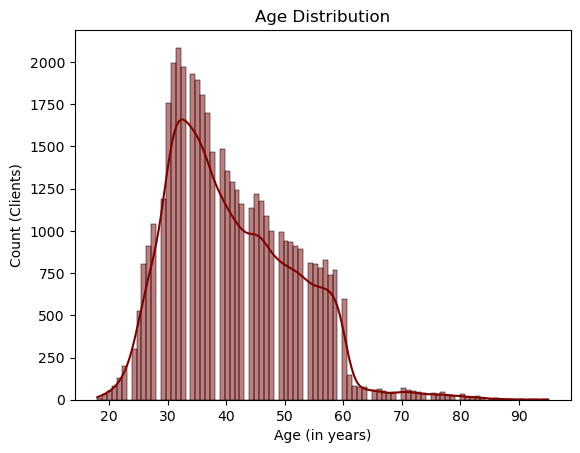

count    45216.000000
mean        40.938186
std         10.621249
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


In [24]:
sns.histplot(data=df, x="age", kde=True, color="maroon")
plt.xlabel("Age (in years)")
plt.ylabel("Count (Clients)")
plt.title("Age Distribution")
plt.savefig("age_distribution.png", bbox_inches='tight')
plt.show()

print(df['age'].describe())

# How does the job type vary among the clients? 

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


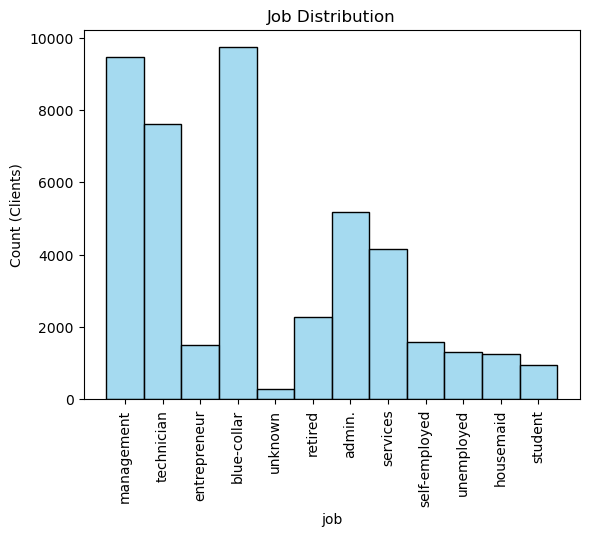

In [25]:
sns.histplot(data=df, x="job", color="skyblue")
plt.xticks(rotation="vertical")
plt.ylabel("Count (Clients)")
plt.title("Job Distribution")
plt.savefig("job_distribution.png", bbox_inches='tight')
plt.show()

# What is the marital status distribution of the clients?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


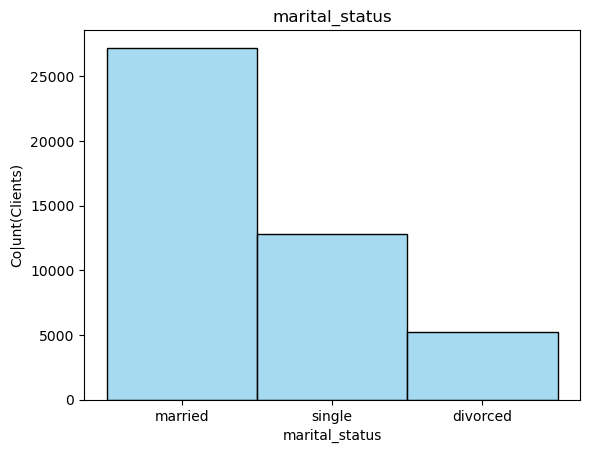

,count
marital_status,
married,27216
single,12790
divorced,5207


In [26]:
sns.histplot(data=df,x="marital_status", color="skyblue")
plt.ylabel("Co|unt(Clients)")
plt.title("marital_status")
plt.savefig(f"marital_status.png",bbox_inches='tight')
plt.show()
ms=df["marital_status"].value_counts()
pd.DataFrame(ms)

# What is the level of education among the clients?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


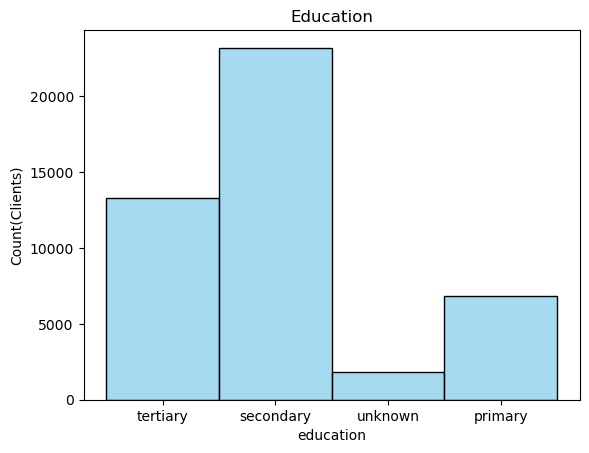

,count
education,
secondary,23204
tertiary,13301
primary,6851
unknown,1857


In [27]:
sns.histplot(data=df,x="education", color="skyblue")
plt.ylabel("Count(Clients)")
plt.title("Education")
plt.savefig(f"Education.png",bbox_inches='tight')
plt.show()

ed=df["education"].value_counts()
pd.DataFrame(ed)

Majority of the clients are secondary qualified

# What proportion of clients have credit in default?

In [28]:
de=df["default"].value_counts()
pde=pd.DataFrame(de)
pde

,count
default,
no,44401
yes,815


In [29]:
no_yes=pde.loc["yes"][0]   # No of clients have default.
total=pde.loc["yes"][0]+pde.loc["no"][0]
fraction=(no_yes/total)*100
print(f"The percentage of clients have credit in default is {round(fraction, 2)} %")

The percentage of clients have credit in default is 1.8 %


C:\Users\amans\AppData\Local\Temp\ipykernel_20072\2851968056.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_yes=pde.loc["yes"][0]   # No of clients have default.
C:\Users\amans\AppData\Local\Temp\ipykernel_20072\2851968056.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total=pde.loc["yes"][0]+pde.loc["no"][0]


# What is the distribution of average yearly balance among the clients?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


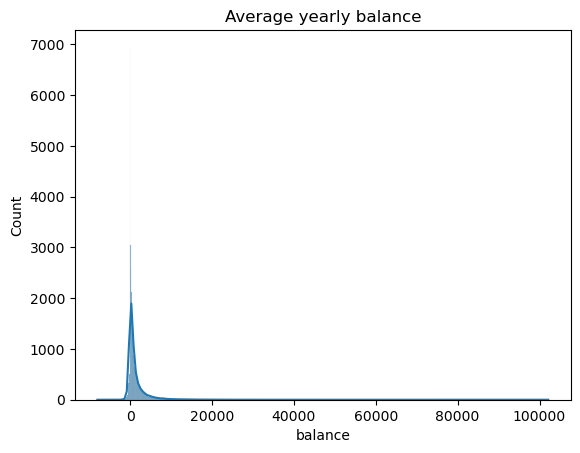

90% of clients have balance less than 3574.0


,balance
count,45216.000000
mean,1362.277844
std,3044.609674
min,-8019.000000
25%,72.000000
50%,448.500000
75%,1428.000000
max,102127.000000


In [30]:
sns.histplot(data=df,x="balance",kde=True)
plt.title("Average yearly balance")
plt.savefig(f"balance.png",bbox_inches='tight')
plt.show()
print(f'90% of clients have balance less than {df.balance.quantile(.9)}')
pd.DataFrame(df["balance"].describe())

# How many clients have housing loans?

In [31]:
hl_yes=df.housing[df["housing"]=="yes"].count()
print(f"{hl_yes} clients have housing loans.")

25130 clients have housing loans.


# How many clients have personal loans?

In [32]:
pl_yes=df.loan[df["loan"]=="yes"].count()
print(f"{pl_yes} clients have personal loans.")

7244 clients have personal loans.


# What are the communication types used for contacting clients during the campaign?

In [33]:
con_type=set(df["contact"].values)
print(f"The communication types used for contacting clients during the campaign are: {','.join(con_type)}")

The communication types used for contacting clients during the campaign are: telephone,cellular,unknown


# What is the distribution of the last contact day of the month?

In [34]:
len(set(df["day"]))

31

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


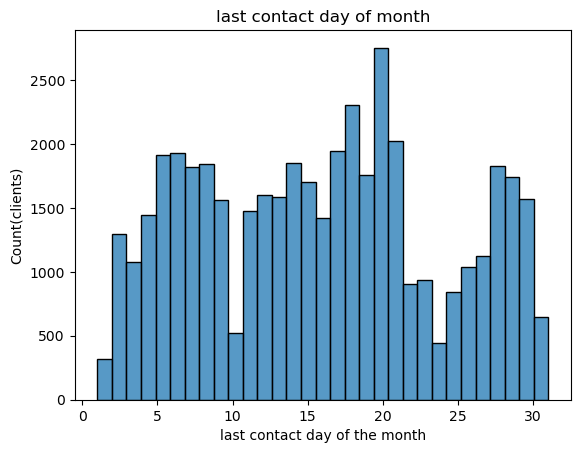

In [35]:
sns.histplot(data=df,x=df["day"],bins=31)
plt.xlabel("last contact day of the month")
plt.ylabel("Count(clients)")
plt.title("last contact day of month")
plt.savefig(f"day.png",bbox_inches='tight')
plt.show()


# How does the last contact month vary among the clients?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


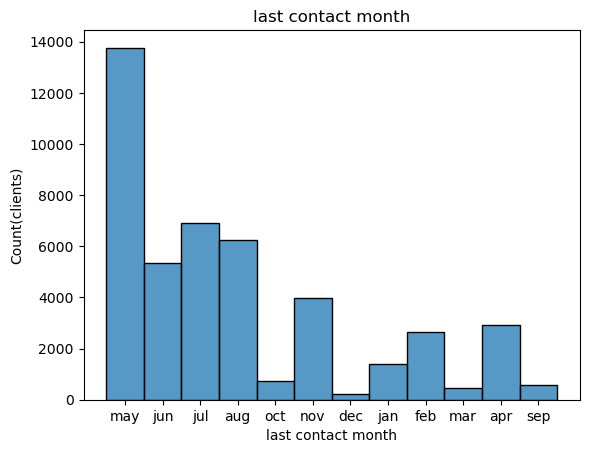

In [36]:
months=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

sns.histplot(data=df,x=df["month"],bins=months)
plt.xlabel("last contact month")
plt.ylabel("Count(clients)")
plt.title("last contact month")
plt.savefig(f"month.png",bbox_inches='tight')
plt.show()

Majority was contacted during the month of may.

# What is the distribution of the duration of the last contact?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


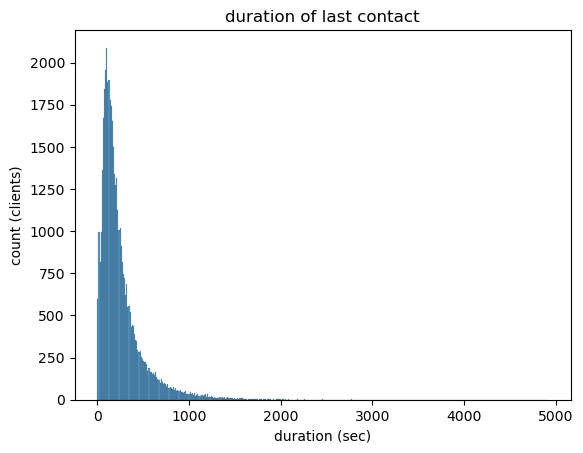

90% of the last contact duration was less than 547.5 sec


,duration
count,45216.000000
mean,258.166202
std,257.515482
min,0.000000
25%,103.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [37]:
sns.histplot(data=df,x="duration")
plt.xlabel("duration (sec)")
plt.ylabel("count (clients)")
plt.title("duration of last contact")
plt.savefig(f"duration.png",bbox_inches='tight')
plt.show()
print(f'90% of the last contact duration was less than {df.duration.quantile(.9)} sec')
pd.DataFrame(df["duration"].describe())

# What is the distribution of the number of days passed since the client was last contacted from a previous campaign?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


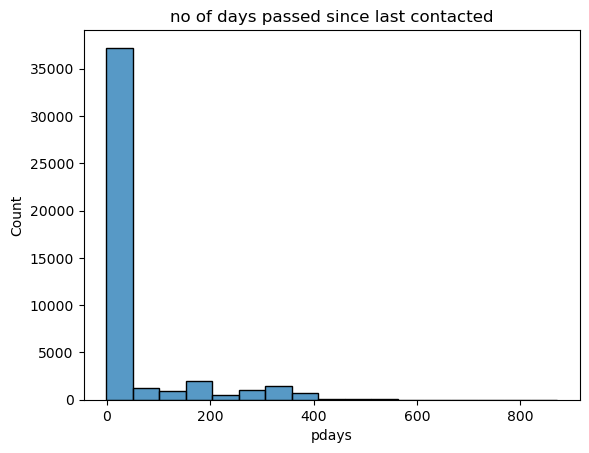

,pdays
count,45216.000000
mean,40.202428
std,100.128248
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


In [38]:
sns.histplot(data=df,x="pdays")
plt.title("no of days passed since last contacted")
plt.savefig(f"pdays.png",bbox_inches='tight')
plt.show()
pd.DataFrame(df["pdays"].describe())

In [39]:
l=len(df["pdays"][df["pdays"]==-1])
print(f'{l} no of clients were not contacted before.')

36956 no of clients were not contacted before.


# How many contacts were performed before the current campaign for each client?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


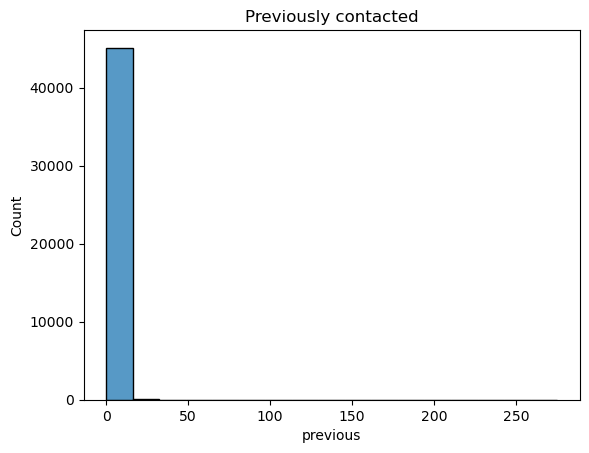

,previous
count,45216.000000
mean,0.580657
std,2.303778
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,275.000000


In [40]:
sns.histplot(data=df,x="previous")
plt.title("Previously contacted")
plt.savefig(f"previous.png",bbox_inches='tight')
plt.show()
pd.DataFrame(df["previous"].describe())

In [41]:
c_0=len(df["previous"][df["previous"]==0])
t_cl=len(df['previous'])
print(f"Among {t_cl} clients, {c_0} no of clients were not contacted previously.")

Among 45216 clients, 36956 no of clients were not contacted previously.


In [42]:
tc=df["previous"].sum(skipna=True)
print(f"For {t_cl-c_0} clients, total no of {tc} contact were done before this campaign.")

For 8260 clients, total no of 26255 contact were done before this campaign.


# What were the outcomes of the previous marketing campaigns?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


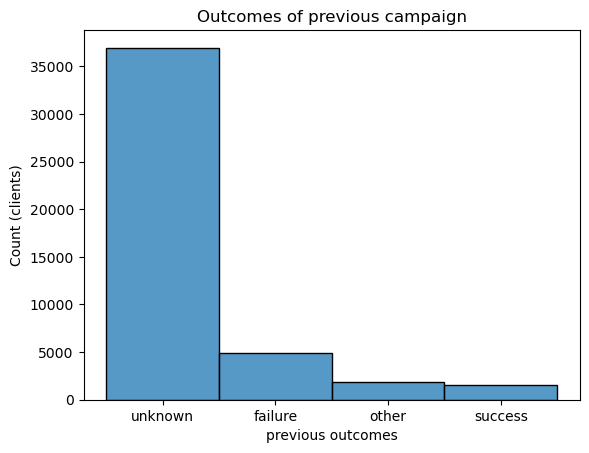

,count
poutcome,
unknown,36961
failure,4902
other,1840
success,1513


In [43]:
sns.histplot(data=df,x="poutcome")
plt.xlabel("previous outcomes")
plt.ylabel("Count (clients)")
plt.title("Outcomes of previous campaign")
plt.savefig(f"poutcome.png",bbox_inches='tight')
plt.show()
poutcome=pd.DataFrame(df["poutcome"].value_counts())
poutcome

# What is the distribution of clients who subscribed to a term deposit vs. those who did not?

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


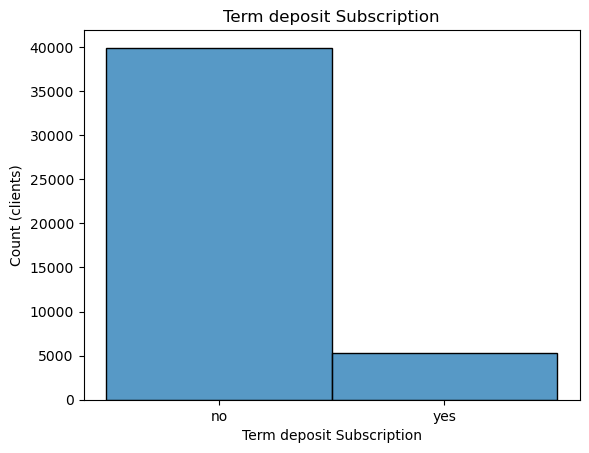

     count
y         
no   39922
yes   5294

11.71% clients subscribed a term deposit


C:\Users\amans\AppData\Local\Temp\ipykernel_20072\1840598725.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per=(y.loc["yes"][0]/len(df))*100


In [44]:
sns.histplot(data=df, x="y")
plt.xlabel("Term deposit Subscription")
plt.ylabel("Count (clients)")
plt.title("Term deposit Subscription")
plt.savefig(f"y.png",bbox_inches='tight')
plt.show()
y=pd.DataFrame(df["y"].value_counts())
print(y)
per=(y.loc["yes"][0]/len(df))*100
print(f'\n{per :.2f}% clients subscribed a term deposit')

# Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

There are two types of features. One is Numerical and other is Categorical. So the correlations are shown in two parts

In [45]:
df["term_subscription"]=df["y"].map({
    "yes":1,
    "no":0
})
df

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y,term_subscription
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no,0
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no,0
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes,1
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes,1
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes,1
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes,1


In [46]:
df.drop(["marital","day_month"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45216 non-null  int64 
 1   job                45216 non-null  object
 2   marital_status     45213 non-null  object
 3   education          45213 non-null  object
 4   default            45216 non-null  object
 5   balance            45216 non-null  int64 
 6   housing            45216 non-null  object
 7   loan               45216 non-null  object
 8   contact            45216 non-null  object
 9   day                45216 non-null  int64 
 10  month              45216 non-null  object
 11  duration           45216 non-null  int64 
 12  campaign           45216 non-null  int64 
 13  pdays              45216 non-null  int64 
 14  previous           45216 non-null  int64 
 15  poutcome           45216 non-null  object
 16  y                  45216 non-null  objec

In [47]:
df.nunique()

age                    77
job                    12
marital_status          3
education               4
default                 2
balance              7168
housing                 2
loan                    2
contact                 3
day                    31
month                  12
duration             1573
campaign               48
pdays                 559
previous               41
poutcome                4
y                       2
term_subscription       2
dtype: int64

In [48]:
imbalance=df[["term_subscription"]].value_counts().to_frame()
imbalance

,count
term_subscription,
0,39922
1,5294


So, There is data imbalance

In [49]:
categorical_features=df.select_dtypes(include='object').columns.tolist()
categorical_features.remove("y")
categorical_features

['job',
 'marital_status',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [50]:
target=df["term_subscription"]

# Numerical features vs Target

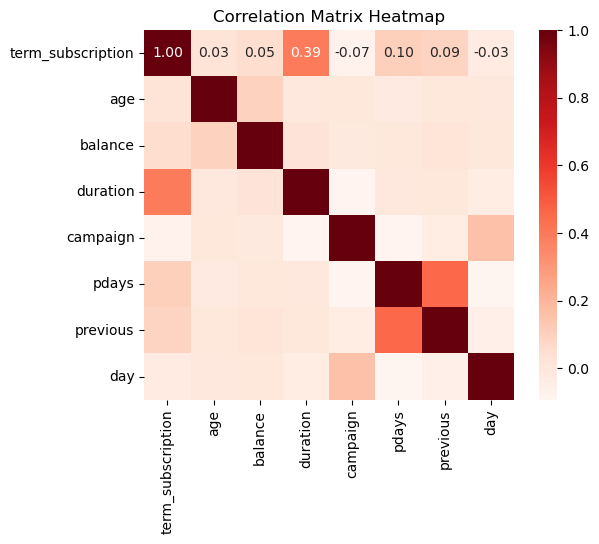

In [51]:
numerical_features=df[["age","balance","duration","campaign","pdays","previous","day"]]
correlation=pd.concat([target,numerical_features],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='Reds', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig(f"correlation_matrix.png",bbox_inches='tight')
plt.show()

In [52]:
numerical=df.select_dtypes(exclude="object").columns.tolist()
numerical.remove("term_subscription")
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

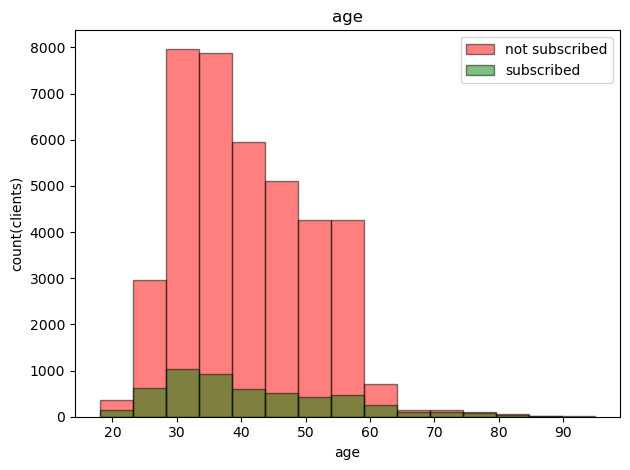

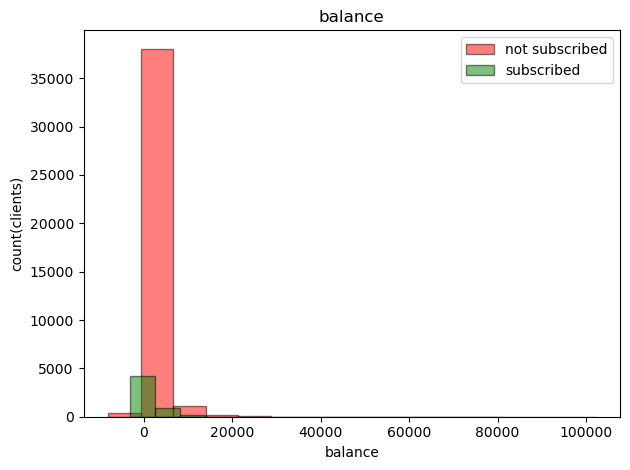

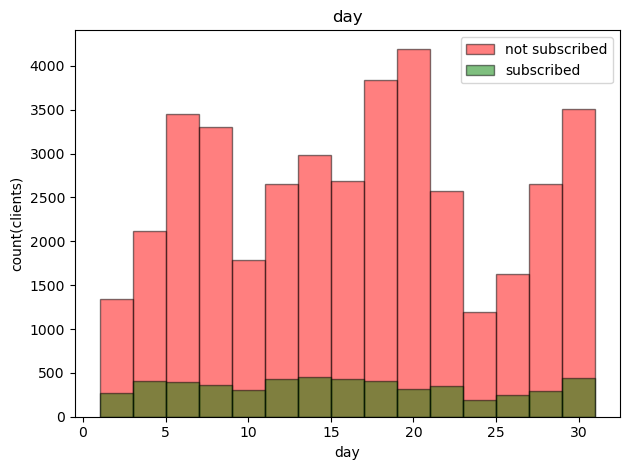

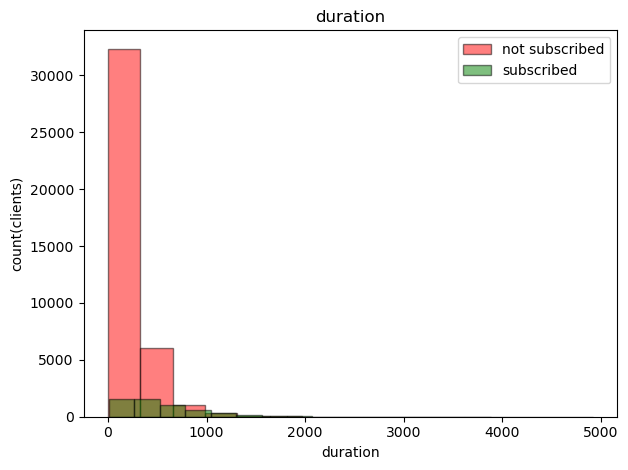

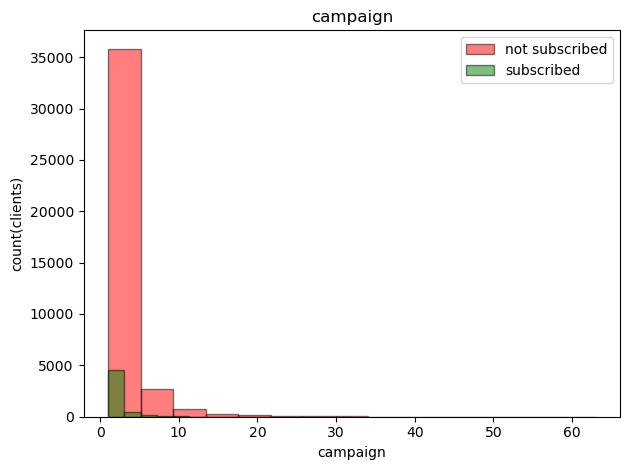

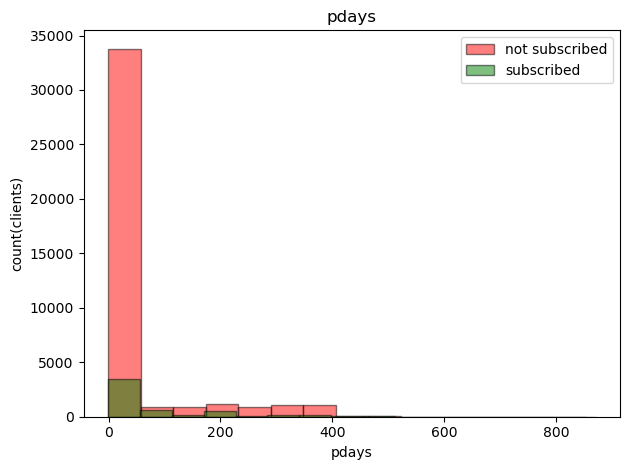

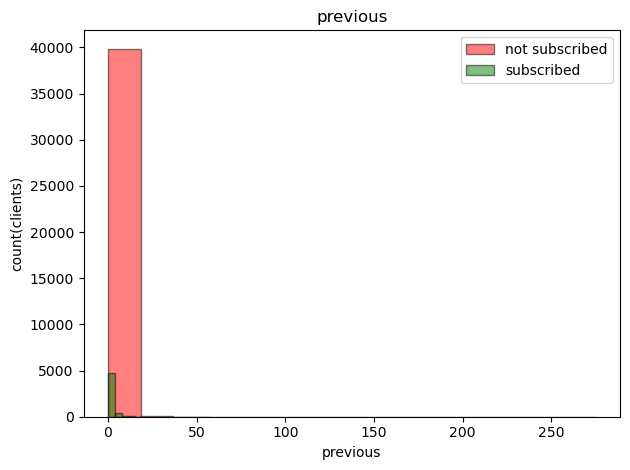

In [53]:
# Plot each numerical feature against the target
for feature in numerical:
    plt.hist(df[df["term_subscription"] ==0][feature], bins = 15, label ='not subscribed', alpha = .50,edgecolor= 'black',color ='red')
    plt.hist(df[df["term_subscription"]==1][feature], bins = 15, label = 'subscribed', alpha = .50, edgecolor = 'black',color = 'green')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('count(clients)')
    plt.legend(loc = 'upper right')
    plt.savefig(f"num_{feature}.png",bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [54]:
df.campaign.describe()

count    45216.000000
mean         2.763668
std          3.097896
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

# Categorical features vs Target

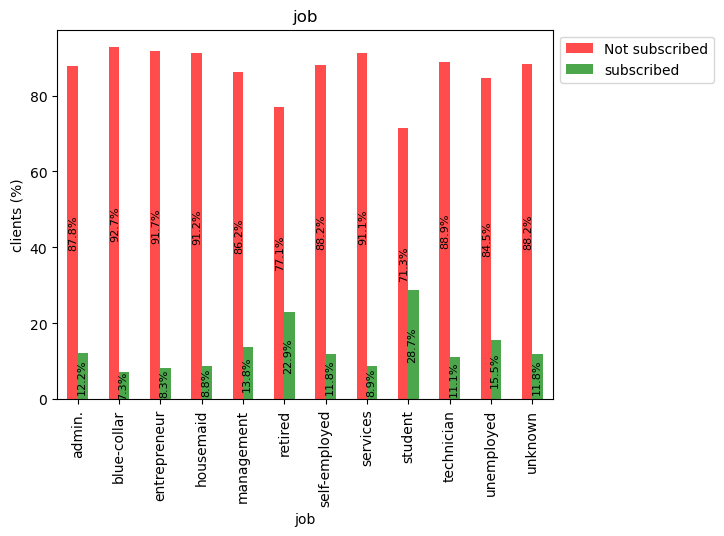

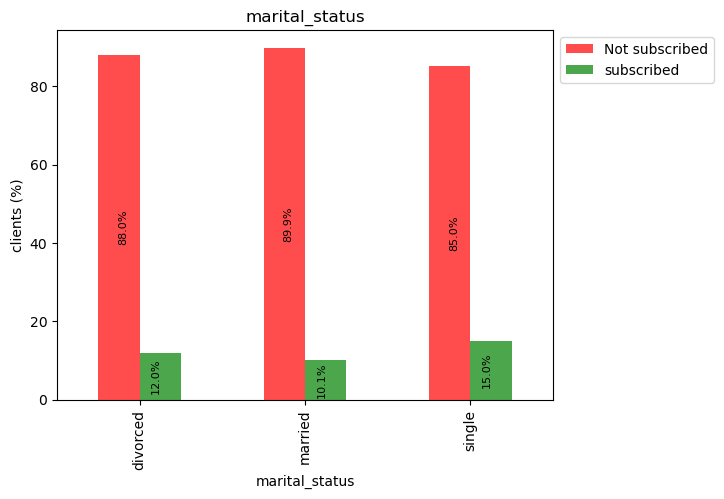

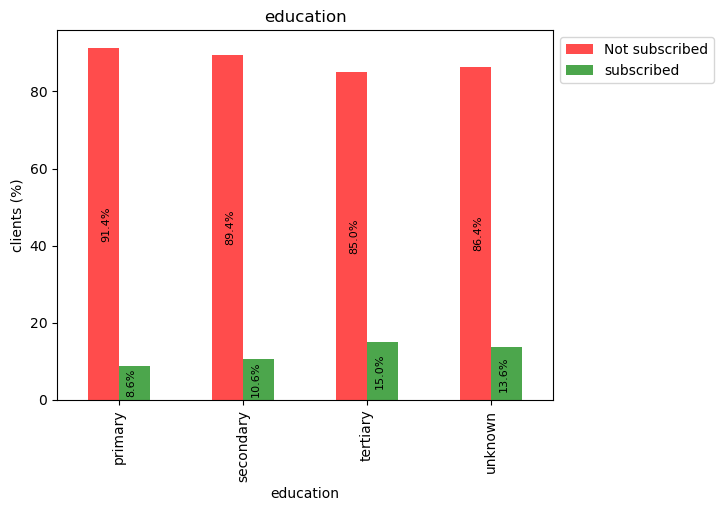

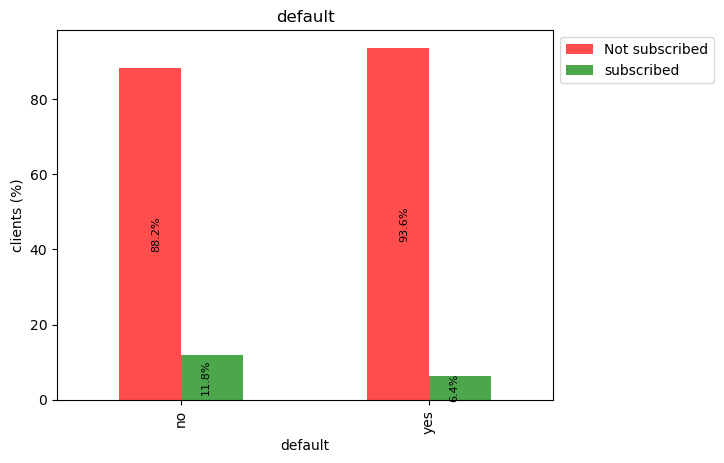

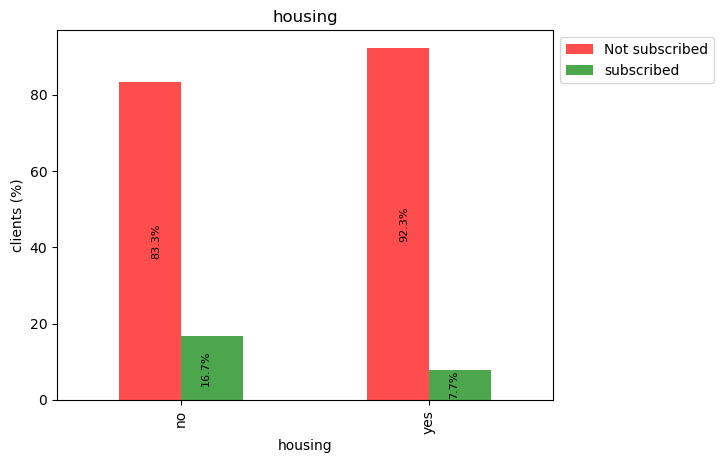

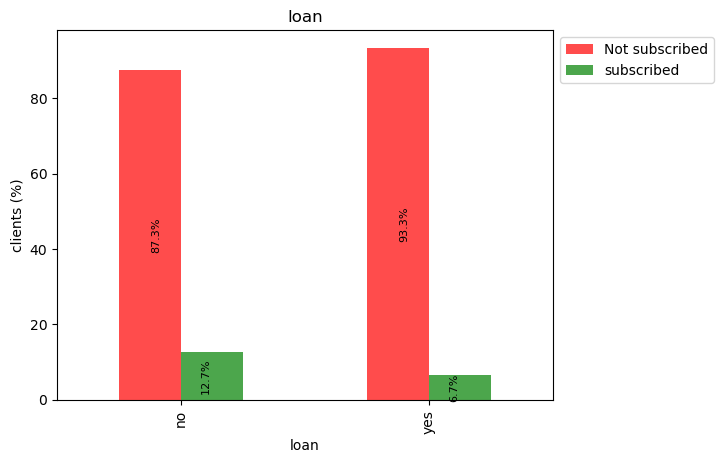

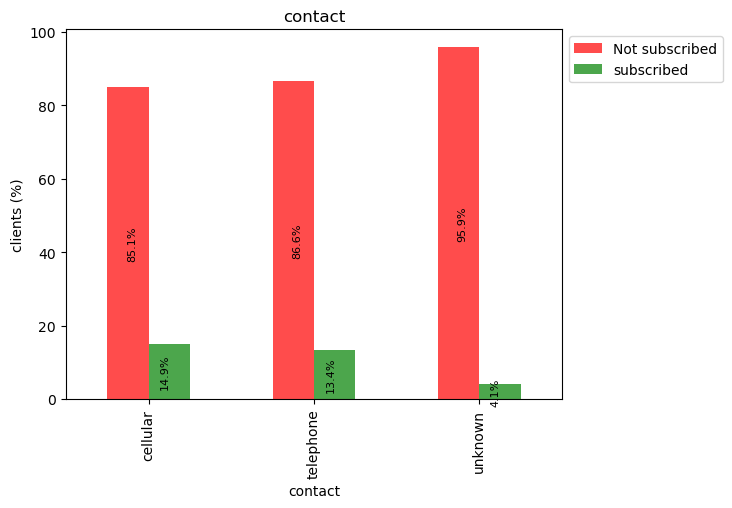

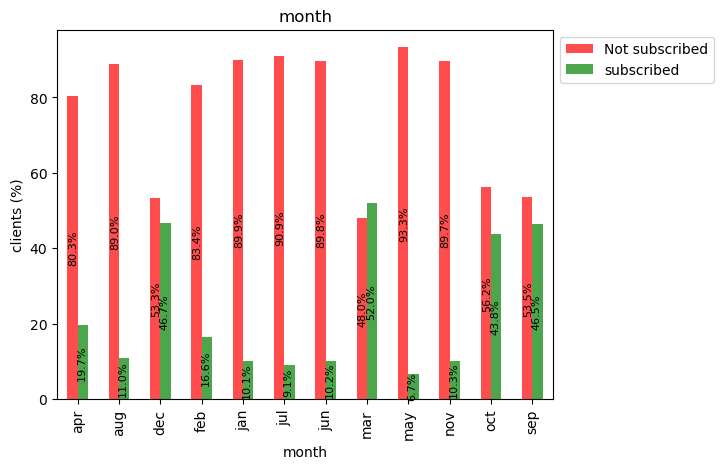

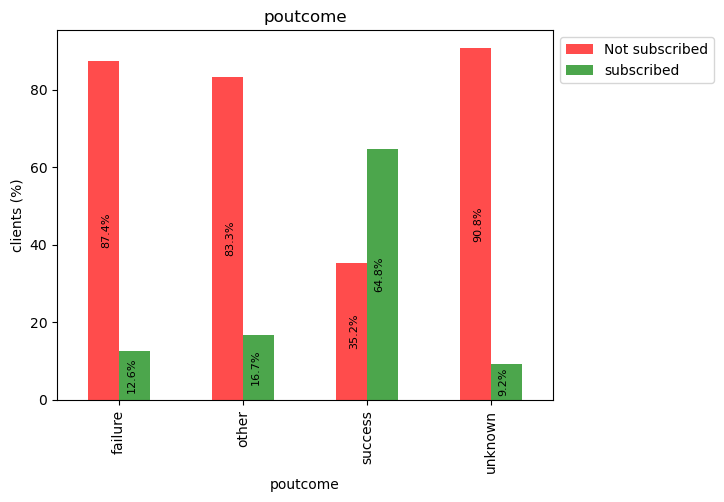

In [55]:

# Plot each categorical feature against the target

for j in categorical_features:
    hous= df.groupby([j,'term_subscription'])[j].count().unstack()  # making group those who subscribed or not
    percentages = hous.div(hous.sum(axis=1), axis=0) * 100      # calculating the percentages for two different category

    p1 = percentages.plot(kind = 'bar', stacked = False, 
                       title = j, 
                       color = ['red','green'], alpha = .70)
    p1.set_xlabel(j)
    p1.set_ylabel('clients (%)')
    p1.legend(['Not subscribed','subscribed'],bbox_to_anchor=(1,1),loc=2)


    for i,index in enumerate(percentages.index):
        not_sub_percentage = percentages.loc[index, 0]
        sub_percentage = percentages.loc[index, 1]        
        p1.text(i-0.1,not_sub_percentage/2, f"{not_sub_percentage:.1f}%", fontsize=8,
                ha='center', va='center', color='black',rotation=90)   # writing the percentage as text

        p1.text(i+0.1,sub_percentage/2, 
                f"{sub_percentage:.1f}%",fontsize=8, ha='center', va='center', color='black', rotation=90)
                                                 # writing the percentage as text
    plt.savefig(f"cat_{j}.png",bbox_inches='tight')
    plt.show()